## Module 3 - Autograded

### Outline:
In this homework assignment, here are learning objectives: 

1. Motivate the use of two-way ANOVA through real data analysis examples.
2. Define a two-way ANOVA model with and without interaction terms. 
3. Formulate three important research questions that can be answered using two-way ANOVA.
4. Interpret the two-way ANOVA model, with and without interaction terms.
5. Construct and interpret interaction plots to visually assess the importance of an interaction term.
6. Conduct hypothesis tests to decide whether a two-way ANOVA interaction term is statistically significant.
7. Use the two-way ANOVA and ANCOVA models to answer research questions using real data.


General tips:

1. Read the questions carefully to understand what is being asked.
2. When you feel that your work is completed, feel free to hit the ```Validate``` button to see your results on the visible unit tests. 
3. Before submitting, we recommend restarting the kernel and running all the cells in order that they appear to make sure that there are no additional bugs in your code.

In [35]:
# Run this cell to import the required packages for this assignment.
library(testthat)
library(tidyverse)

### Problem #1: Does stretching protocol impact vertical jump height? (50 Points)

The experiment used in this problem is a modified version of the one conducted in the 2013 paper ["Acute Effects of Warm-Up Stretch
Protocols on Balance, Vertical Jump Height and Range of Motion in Dancers"](https://www.ncbi.nlm.nih.gov/pubmed/23498355)

(Citation: N. Morrin and E. Redding (2013). "Acute Effects of Warm-Up Stretch
Protocols on Balnce, Vertical Jump Height and Range of Motion in Dancers,"
Journal of Dance Medicine & Science, Vol. 17, #1, pp. 34-40)

The research question being asked in this experiment is: Does stretching protocol impact vertical jump height? The variables measured include:

1. dancer = dancer (1-10)

2. stretch = stretch protocol (1=Static Stretching, 2=Dynamic Stretching, 3=Combination Stretching, 4=No Stretch)

3. condition = the physical condition of the dancer (1 = less conditioned, 2 = more conditioned)

4. height = vertical jump height (cm) 

Dancers were first sorted into a condition group, based on how much dance training that they had recently done. Then, stretching routines were randomly assigned to dancers within each condition group. In this case, condition served as the blocking variable, and stretch as the treatment variable. Vertical jump height is the response. 

Here's the data...

In [36]:
dance = read.table("dancer_warmup.dat", sep = "")
names(dance) = c("stretch", "dancer", "height")
dance = dance %>%
    mutate(condition = ifelse(dancer == 1 | dancer == 2 | dancer == 3 | dancer == 4 |
                              dancer == 5, 1,2))%>%
    select(dancer, stretch, condition, height) %>%
    mutate(stretch = as.factor(stretch), dancer = as.factor(dancer), condition = as.factor(condition))

head(dance)

,dancer,stretch,condition,height
,<fct>,<fct>,<fct>,<dbl>
1,1,1,1,32.76
2,2,1,1,32.67
3,3,1,1,23.04
4,4,1,1,45.63
5,5,1,1,29.29
6,6,1,2,28.90


#### 1. (a) Produce an interaction plot to detect whether there are interactions between ${\tt stretch}$ and ${\tt condition}$. Specifically, store a ${\tt ggplot}$ object called ${\tt p1}$ looking at the relationship between ${\tt stretch}$ and ${\tt height}$ grouping on ${\tt condition}$.

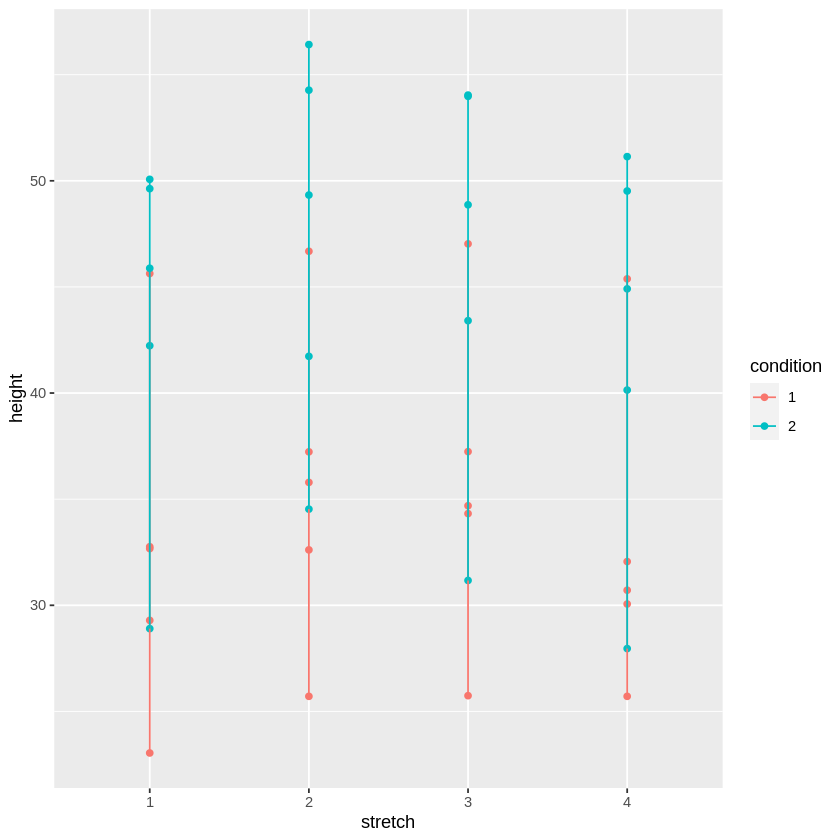

In [37]:
p1 =  ggplot(dance, aes(x = stretch, y = height, color = condition)) +
  geom_point() +
  geom_line()


# your code here


p1

In [38]:
# Test Cell
# This cell has hidden test cases that will run after submission.

#### 1. (b) Produce an interaction plot to detect whether there are interactions between ${\tt stretch}$ and ${\tt condition}$. Specifically, store a ${\tt ggplot}$ object called ${\tt p2}$ looking at the relationship between ${\tt condition}$ and ${\tt height}$ grouping on ${\tt stretch}$.

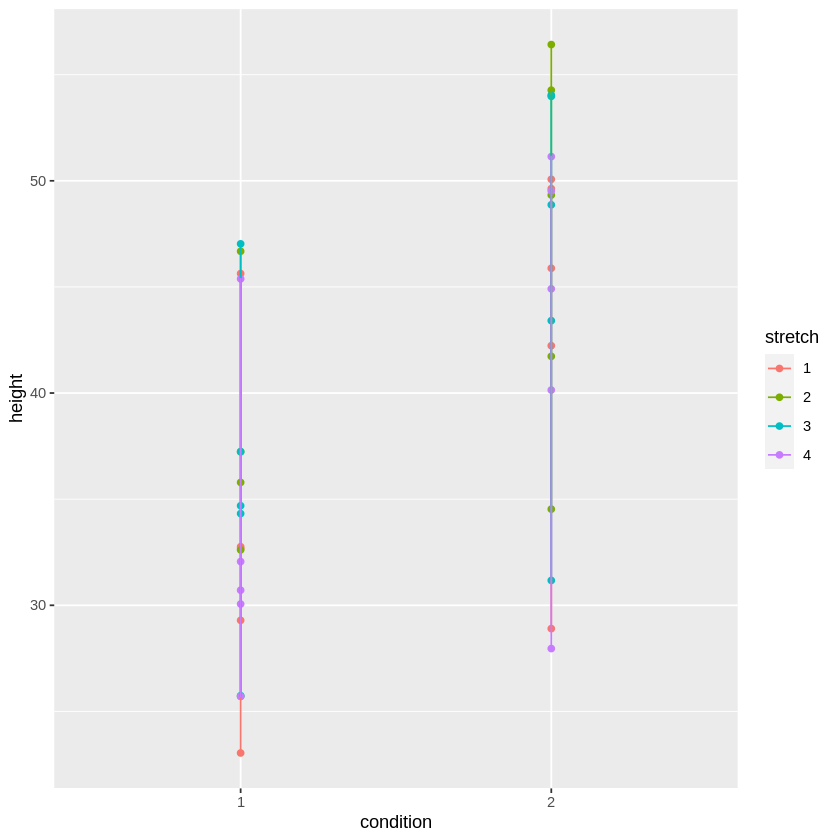

In [39]:
p2 = ggplot(dance, aes(x = condition, y = height, color = stretch)) +
  geom_point() +
  geom_line()

# your code here


p2

In [40]:
# Test Cell
# This cell has hidden test cases that will run after submission.

#### 1. (c) Create two linear models:
- A model, stored as ${\tt rcbd}\_{\tt int}$, that uses ${\tt stretch}$, ${\tt condition}$, and an interaction term to predict jump height.
- A model, stored as ${\tt rcbd}$, that uses ${\tt stretch}$, ${\tt condition}$, and ***NO*** interaction term to predict jump height.

In [41]:
rcbd_int <- lm(height ~ stretch * condition, data = dance)
rcbd <- lm(height ~ stretch + condition, data = dance)
# your code here


In [42]:
# Test Cell
if(test_that('checking 2 models: ',{
expect_is(rcbd_int,"lm")
expect_is(rcbd,"lm")})){
    print('Two linear models: PASS')
    print('Reminder: make sure that you have the correct predictors/response!')
}
# This cell has hidden test cases that will run after submission.

[1] "Two linear models: PASS"
[1] "Reminder: make sure that you have the correct predictors/response!"


#### 1. (d) Run an F-test between ${\tt rcbd}\_{\tt int}$ and ${\tt rcbd}$ to determine if the interaction term is statistically significant. Store the p-value from the F-test in the object ${\tt rcbd}\_{\tt ftest}\_{\tt pvalue}$.

In [44]:
f_test <- anova(rcbd_int,  rcbd)
rcbd_ftest_pvalue <- f_test$`Pr(>F)`[2]
f_test
# your code here


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,32,2298.329,NA,NA,NA,NA
2,35,2302.113,-3,-3.78429,0.01756309,0.9967649


In [10]:
# Test Cell
# This cell has hidden test cases that will run after submission.

#### 1. (e) Run a full F-test on the better model (determined by 1.(d)) in order to decide if there is a statistically significant difference in mean vertical jump height across stretching routines. Store the p-value of the ${\tt stretch}$  factor from the F-test in the object ${\tt stretch}\_{\tt ftest}\_{\tt pvalue}$.

In [48]:
stretch_ftest_pvalue = NULL
# Display the p-value

# stretch_ftest_pvalue <- 0.00352 summary(rcbd)
# stretch_ftest_pvalue <- 0.00352007626458719
# stretch_ftest_pvalue <- 0.03579 summary(rcbd_int)
# stretch_ftest_pvalue <- 0.0357934329365804
# stretch_ftest_pvalue  <- 0.9967649 anova(rcbd_int, rcbd)$`Pr(>F)`[2]
# stretch_ftest_pvalue <- 0.996764942169362  anova(rcbd_int, rcbd)$`Pr(>F)`[2]
# stretch_ftest_pvalue <- 0.634808811353643 anova(rcbd)$`Pr(>F)`[1]
anova(rcbd)$`Pr(>F)`[1]

stretch_ftest_pvalue <- anova(rcbd)$`Pr(>F)`[1]
stretch_ftest_pvalue




Call:
lm(formula = height ~ stretch + condition, data = dance)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2235  -3.4005  -0.1455   6.4913  12.9655 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   32.666      2.867  11.392 2.52e-13 ***
stretch2       3.420      3.627   0.943 0.352178    
stretch3       3.039      3.627   0.838 0.407779    
stretch4      -0.251      3.627  -0.069 0.945221    
condition2    10.689      2.565   4.168 0.000192 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.11 on 35 degrees of freedom
Multiple R-squared:  0.353,	Adjusted R-squared:  0.2791 
F-statistic: 4.774 on 4 and 35 DF,  p-value: 0.00352


[1] 0.6348088

[1] 0.6348088

In [20]:
# Test Cell
# This cell has hidden test cases that will run after submission.